In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import sys
import os


from pathlib import Path
from cstreet import *

/data1/home/jyj/miniconda3/envs/py_cstreet/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_PATH = Path("/data3/projects/2025_GTRA/data/1_MND/raw")
RES_PATH = Path("/data1/home/jyj/PROJECT/2025/2025_GTra/results/MND/figures")

# Load mouse neuron development
adata = sc.read_h5ad(DATA_PATH / "MouseCortex.h5ad")

In [3]:
# obs, var 전체를 문자열로 변환
adata.obs = adata.obs.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)
adata.var_names = adata.var_names.map(lambda x: x.decode() if isinstance(x, bytes) else str(x))

In [4]:
data1=adata[(adata.obs["Time_points"]=="e11"),]
data2=adata[(adata.obs["Time_points"]=="e13"),]
data3=adata[(adata.obs["Time_points"]=="e15"),]
data4=adata[(adata.obs["Time_points"]=="e17"),]


In [6]:
state1=data1.obs["cell_type2"].tolist()
state2=data2.obs["cell_type2"].tolist()
state3=data3.obs["cell_type2"].tolist()
state4=data4.obs["cell_type2"].tolist()

In [7]:
cdata=CStreetData()

In [8]:
cdata.add_new_timepoint_scdata(data1.to_df(),state1)
cdata.add_new_timepoint_scdata(data2.to_df(),state2)
cdata.add_new_timepoint_scdata(data3.to_df(),state3)
cdata.add_new_timepoint_scdata(data4.to_df(),state4)

In [9]:
cdata.params.Output_Name="CStreet_rank"
cdata.params.Switch_Normalize=False
cdata.params.Switch_LogTransform=False

cdata.params.ProbParam_SamplingSize=50

cdata.params.Threshold_MinCellNumofStates=20
cdata.params.Threshold_MinProbability=0.09
cdata.params.WithinTimePointParam_k=25
cdata.params.BetweenTimePointParam_k=25
cdata.params.FigureParam_FigureSize=(10, 7)

Trying to set attribute `.var` of view, copying.



[Function: run_cstreet start...]


[Function: cell_clusters start...]

The result folder ./CStreet_rank exists! CStreet overwrite it. To avoid the overwriting, try the -o parameter.
timepoint:1
clusters have been given
timepoint:2
clusters have been given
timepoint:3
clusters have been given
timepoint:4
clusters have been given

[Function: cell_clusters finished, spent time: 0.01s]


[Function: filter_dead_cell start...]

timepoint:1
filtered out 0 cells that are detected in more than 0.2 mito percent

timepoint:2
filtered out 0 cells that are detected in more than 0.2 mito percent

timepoint:3
filtered out 0 cells that are detected in more than 0.2 mito percent

timepoint:4
filtered out 0 cells that are detected in more than 0.2 mito percent


[Function: filter_dead_cell finished, spent time: 0.09s]


[Function: filter_lowcell_gene start...]



Trying to set attribute `.var` of view, copying.


timepoint:1
filtered out 14 genes that are detected in less than 3 cells



Trying to set attribute `.var` of view, copying.


timepoint:2
filtered out 4 genes that are detected in less than 3 cells



Trying to set attribute `.var` of view, copying.


timepoint:3
filtered out 17 genes that are detected in less than 3 cells

timepoint:4
filtered out 22 genes that are detected in less than 3 cells


[Function: filter_lowcell_gene finished, spent time: 1.31s]


[Function: filter_lowgene_cells start...]

timepoint:1
filtered out 0 cells that are detected in less than 200 genes

timepoint:2
filtered out 0 cells that are detected in less than 200 genes

timepoint:3
filtered out 0 cells that are detected in less than 200 genes

timepoint:4
filtered out 0 cells that are detected in less than 200 genes


[Function: filter_lowgene_cells finished, spent time: 0.41s]


[Function: get_knn_within start...]

timepoint:1

timepoint:2

timepoint:3

timepoint:4


[Function: get_knn_within finished, spent time: 68.89s]


[Function: get_knn_between start...]

timepoint between 1 and 2 
timepoint between 2 and 3 
timepoint between 3 and 4 

[Function: get_knn_between finished, spent time: 79.54s]


[Function: get_knn_graph start...]

timepoint:1
timepoi

100%|██████████| 2000/2000 [00:00<00:00, 70585.63it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


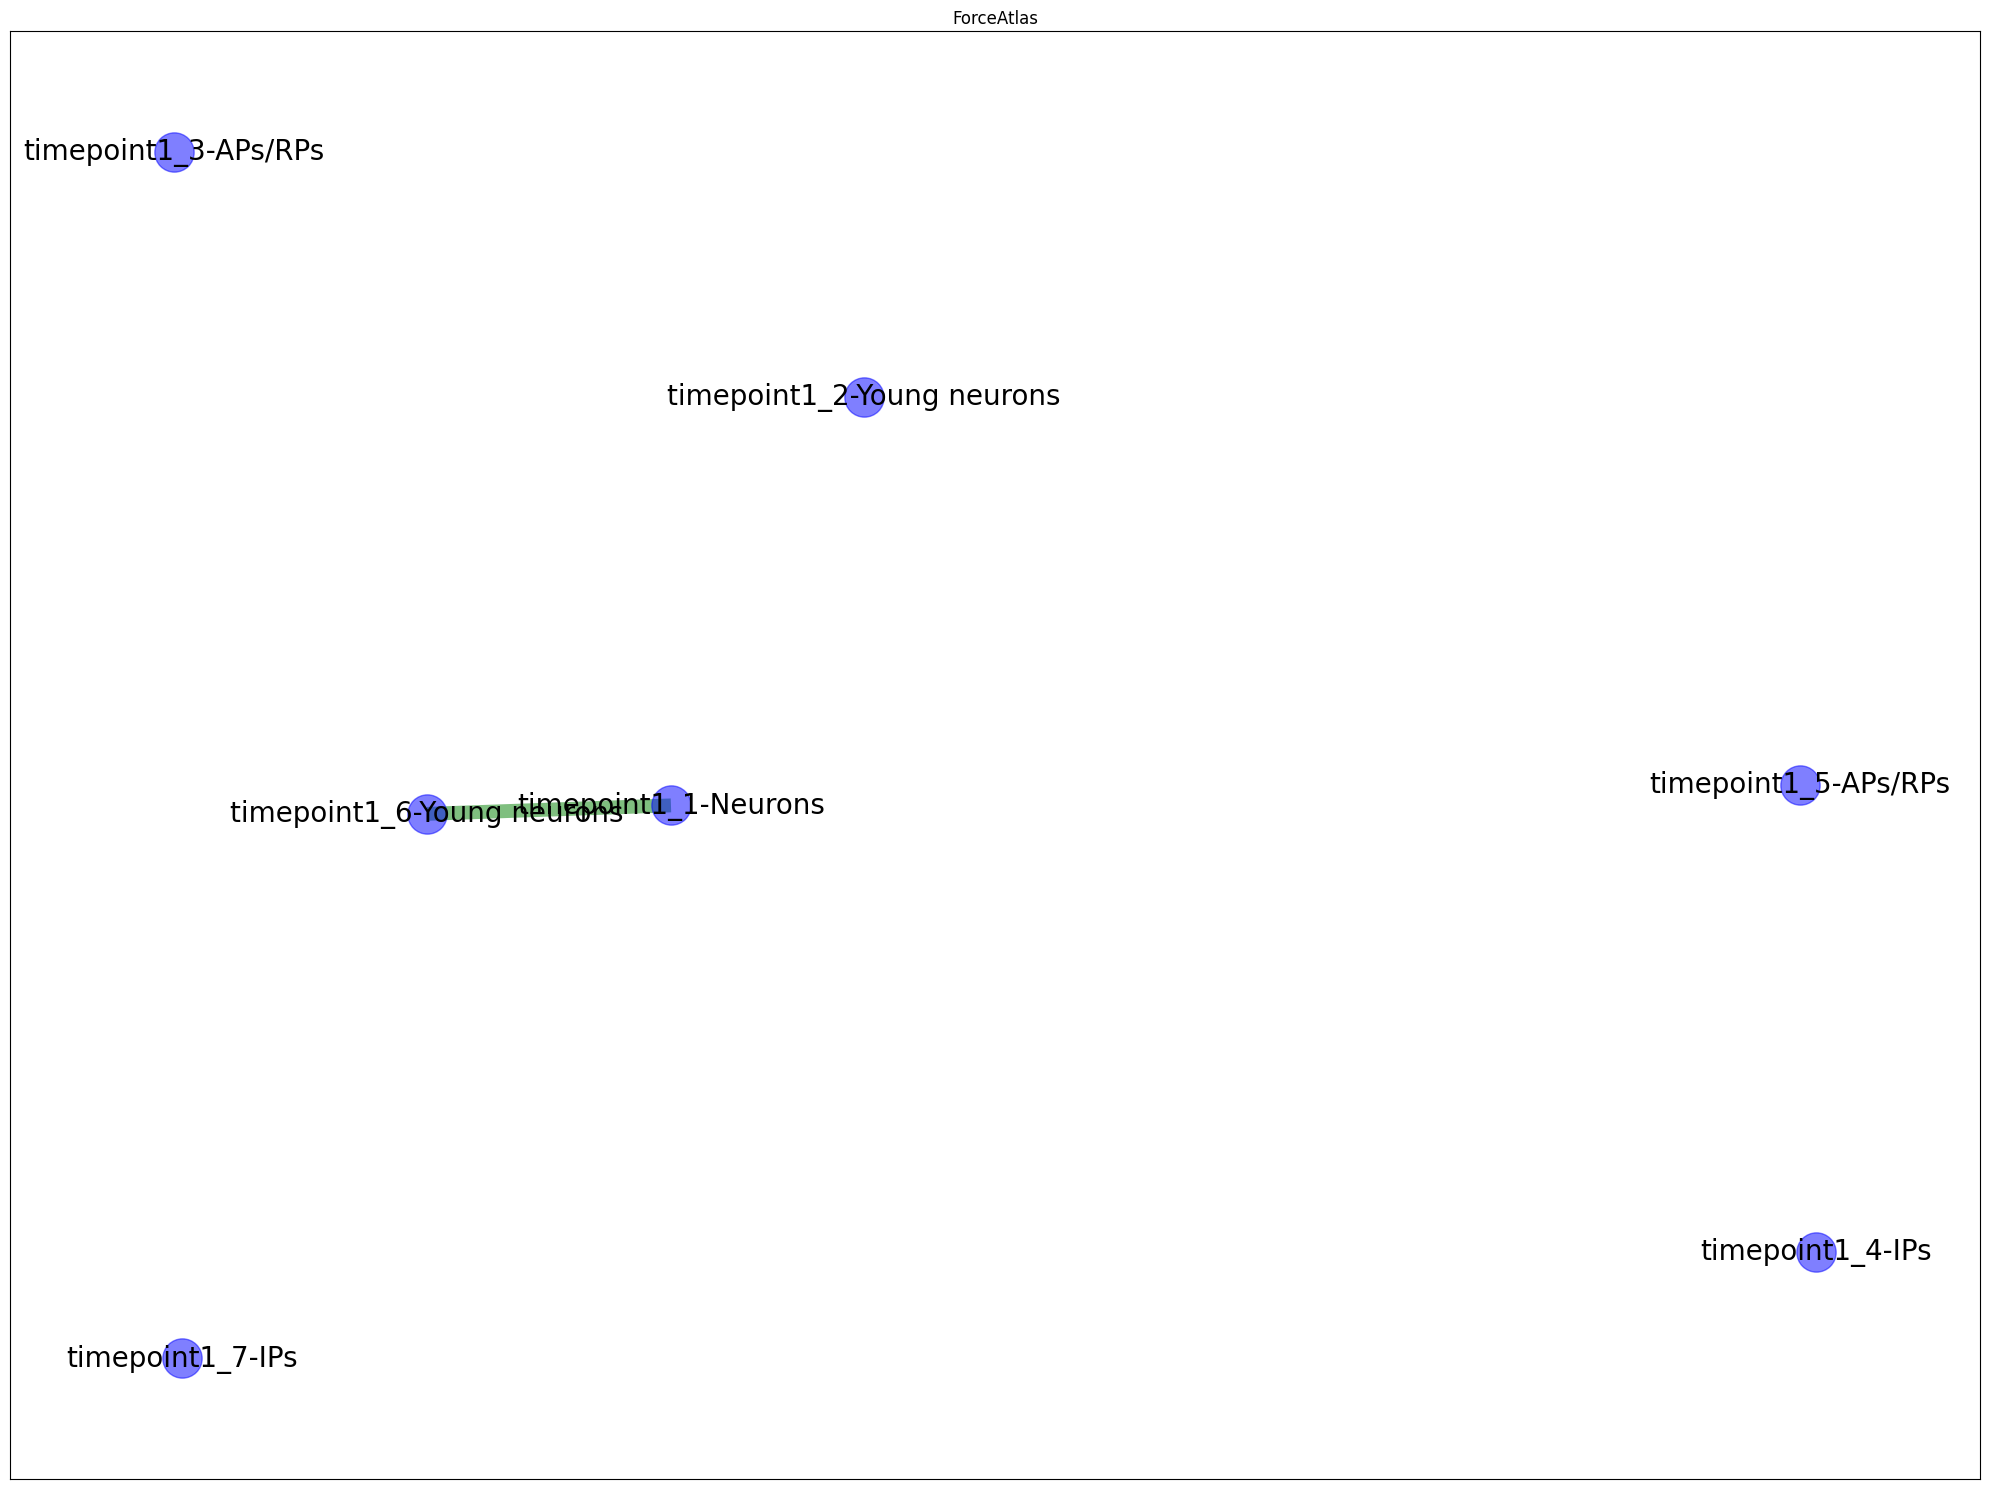

timepoint:2


100%|██████████| 2000/2000 [00:00<00:00, 92362.15it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


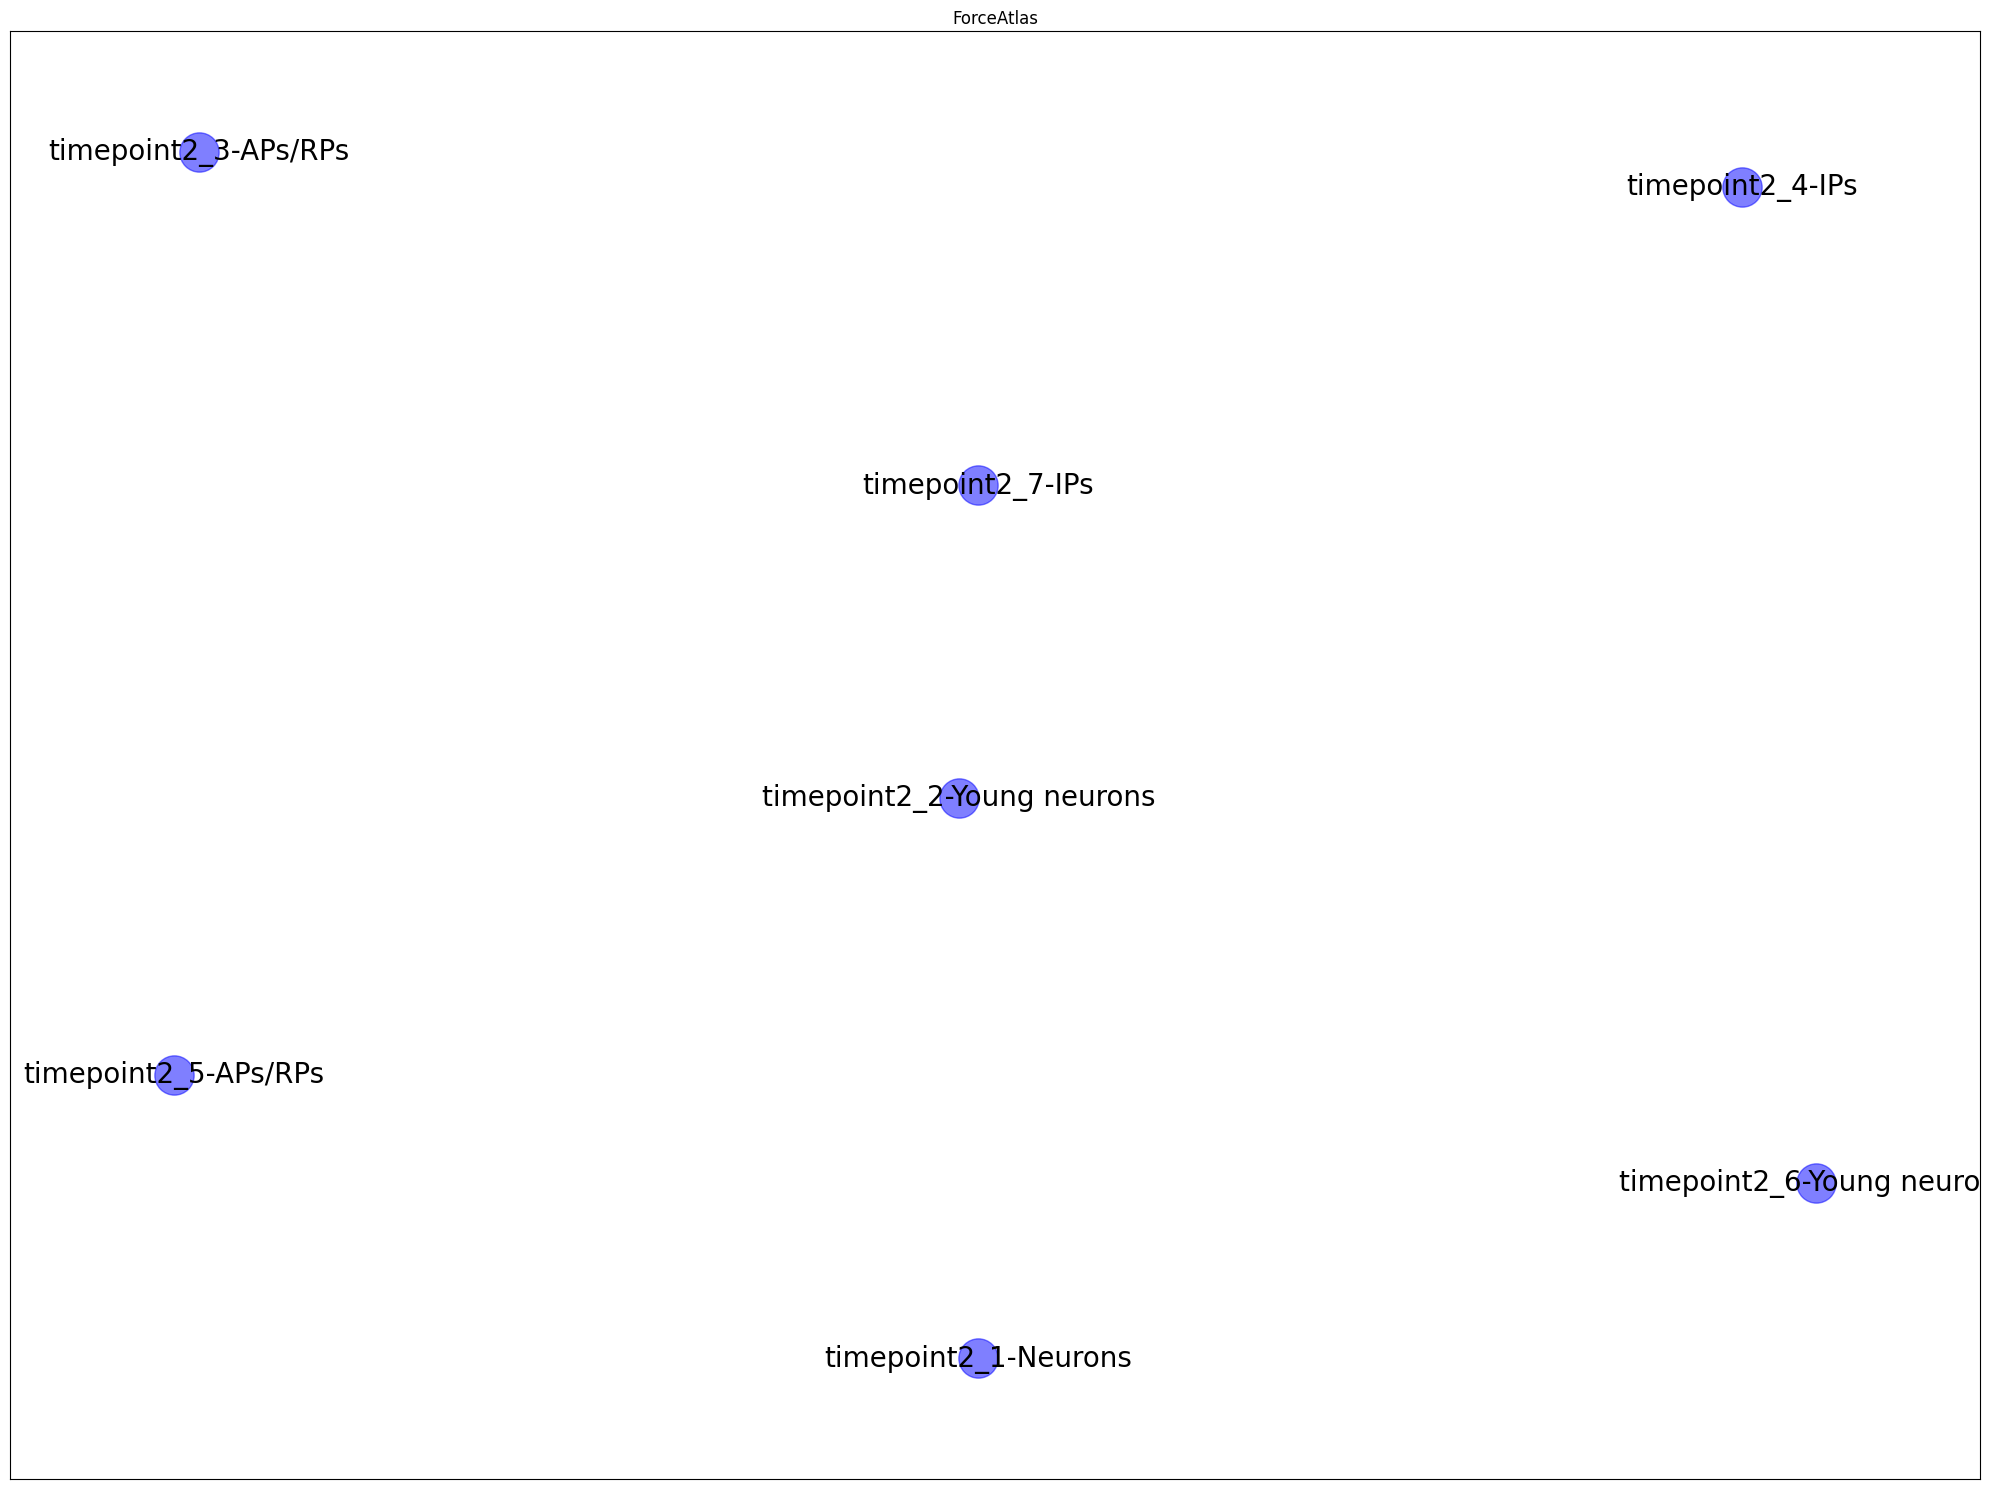

timepoint:3


100%|██████████| 2000/2000 [00:00<00:00, 91562.70it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


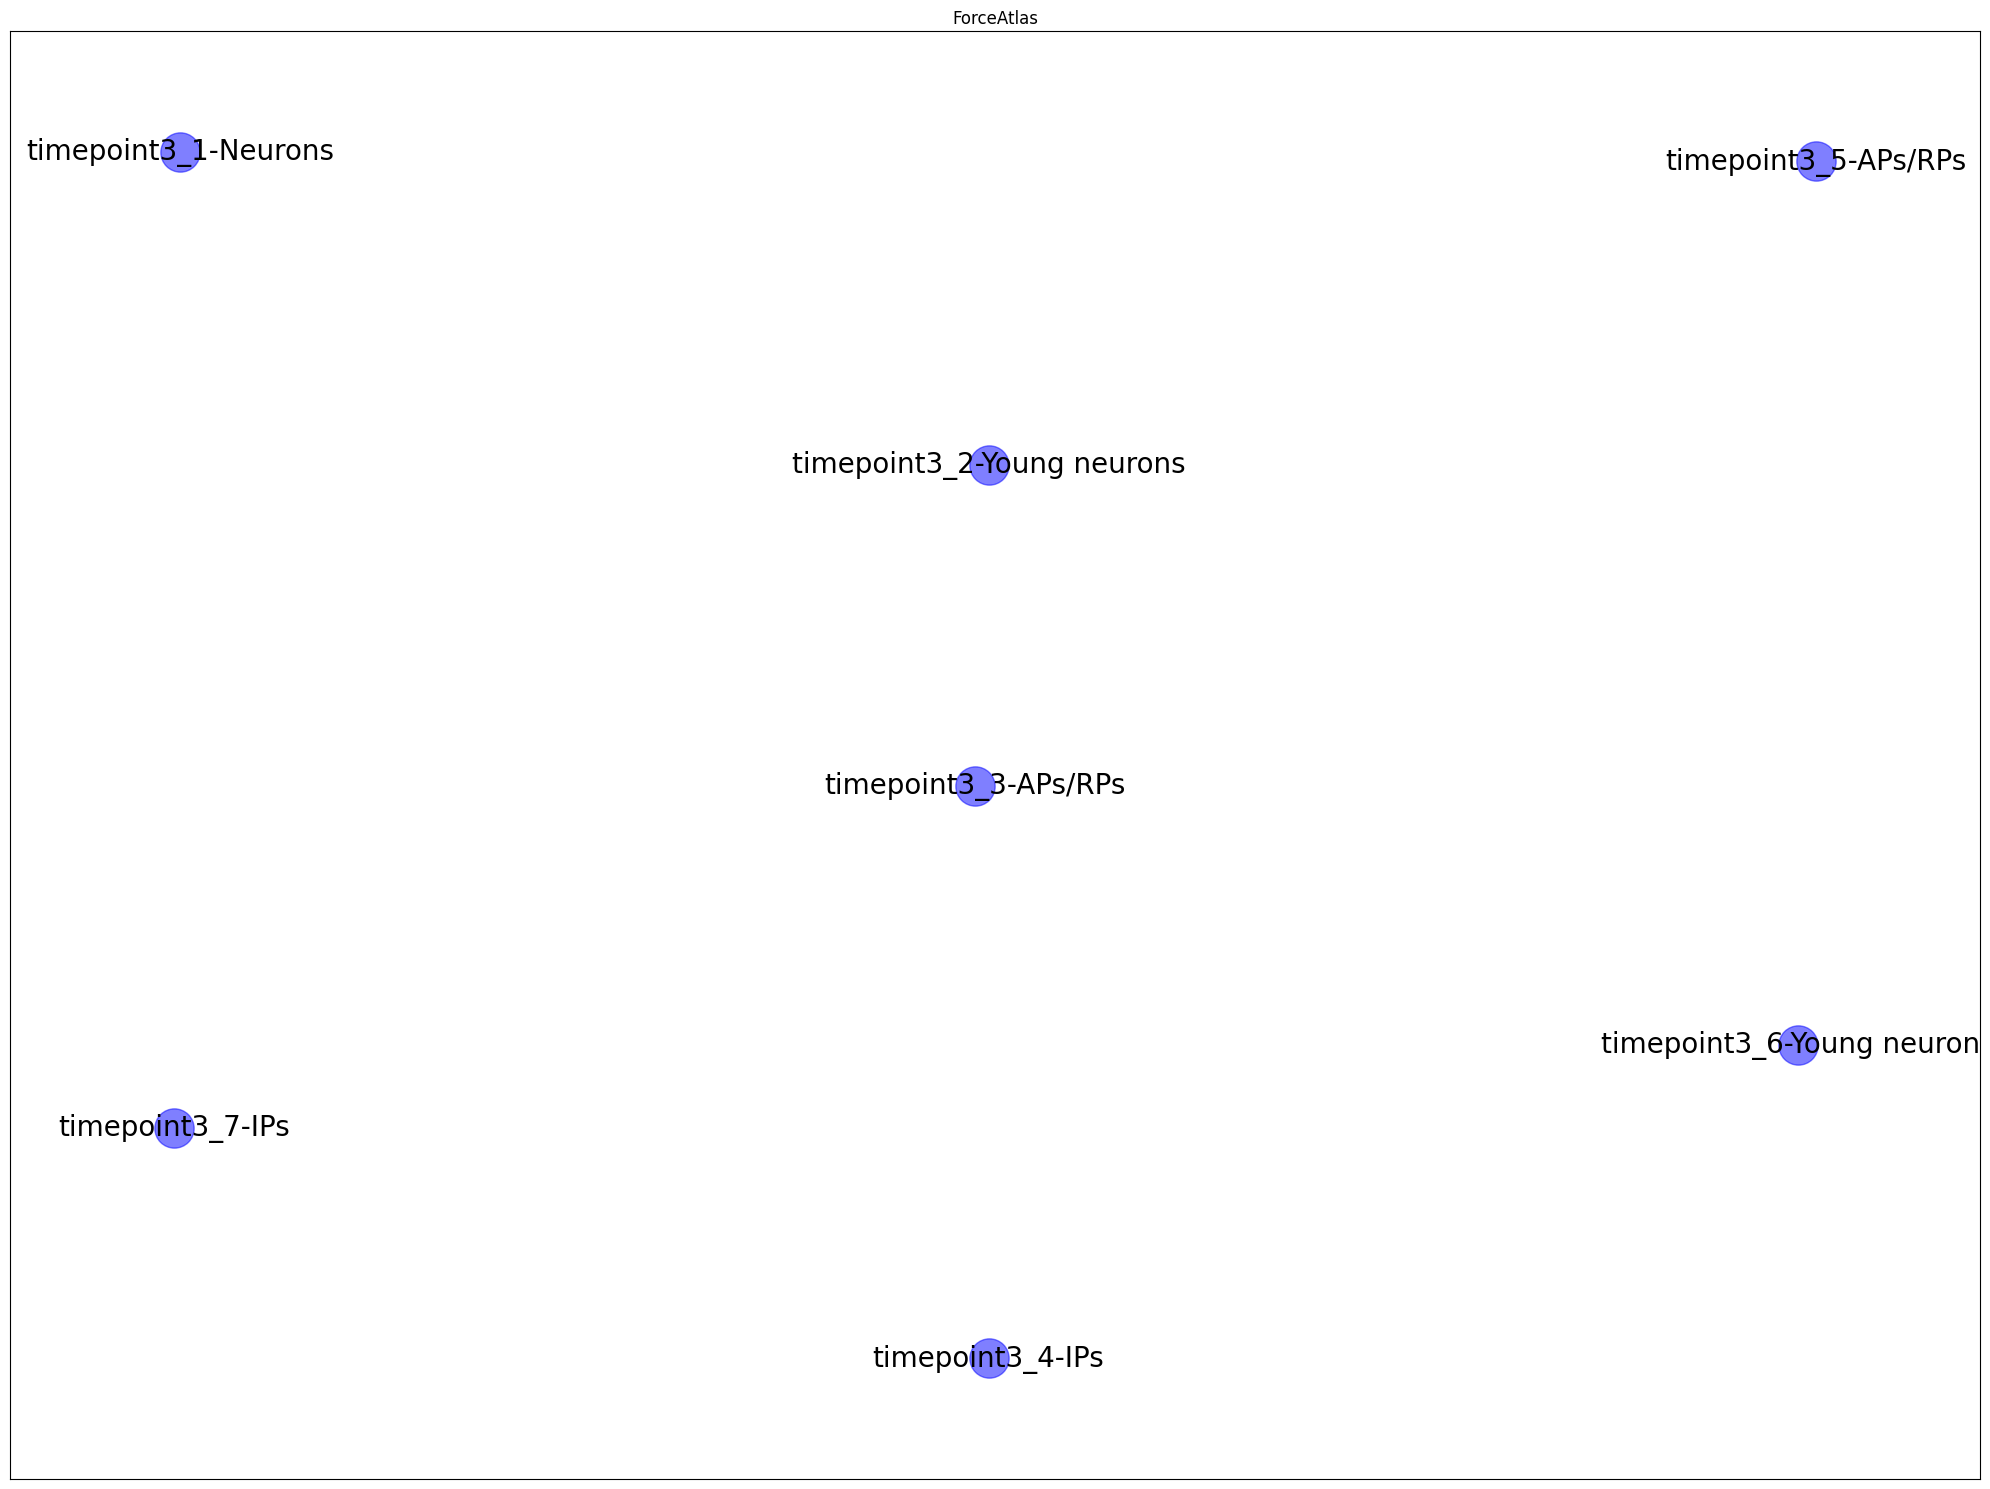

timepoint:4


100%|██████████| 2000/2000 [00:00<00:00, 123822.58it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


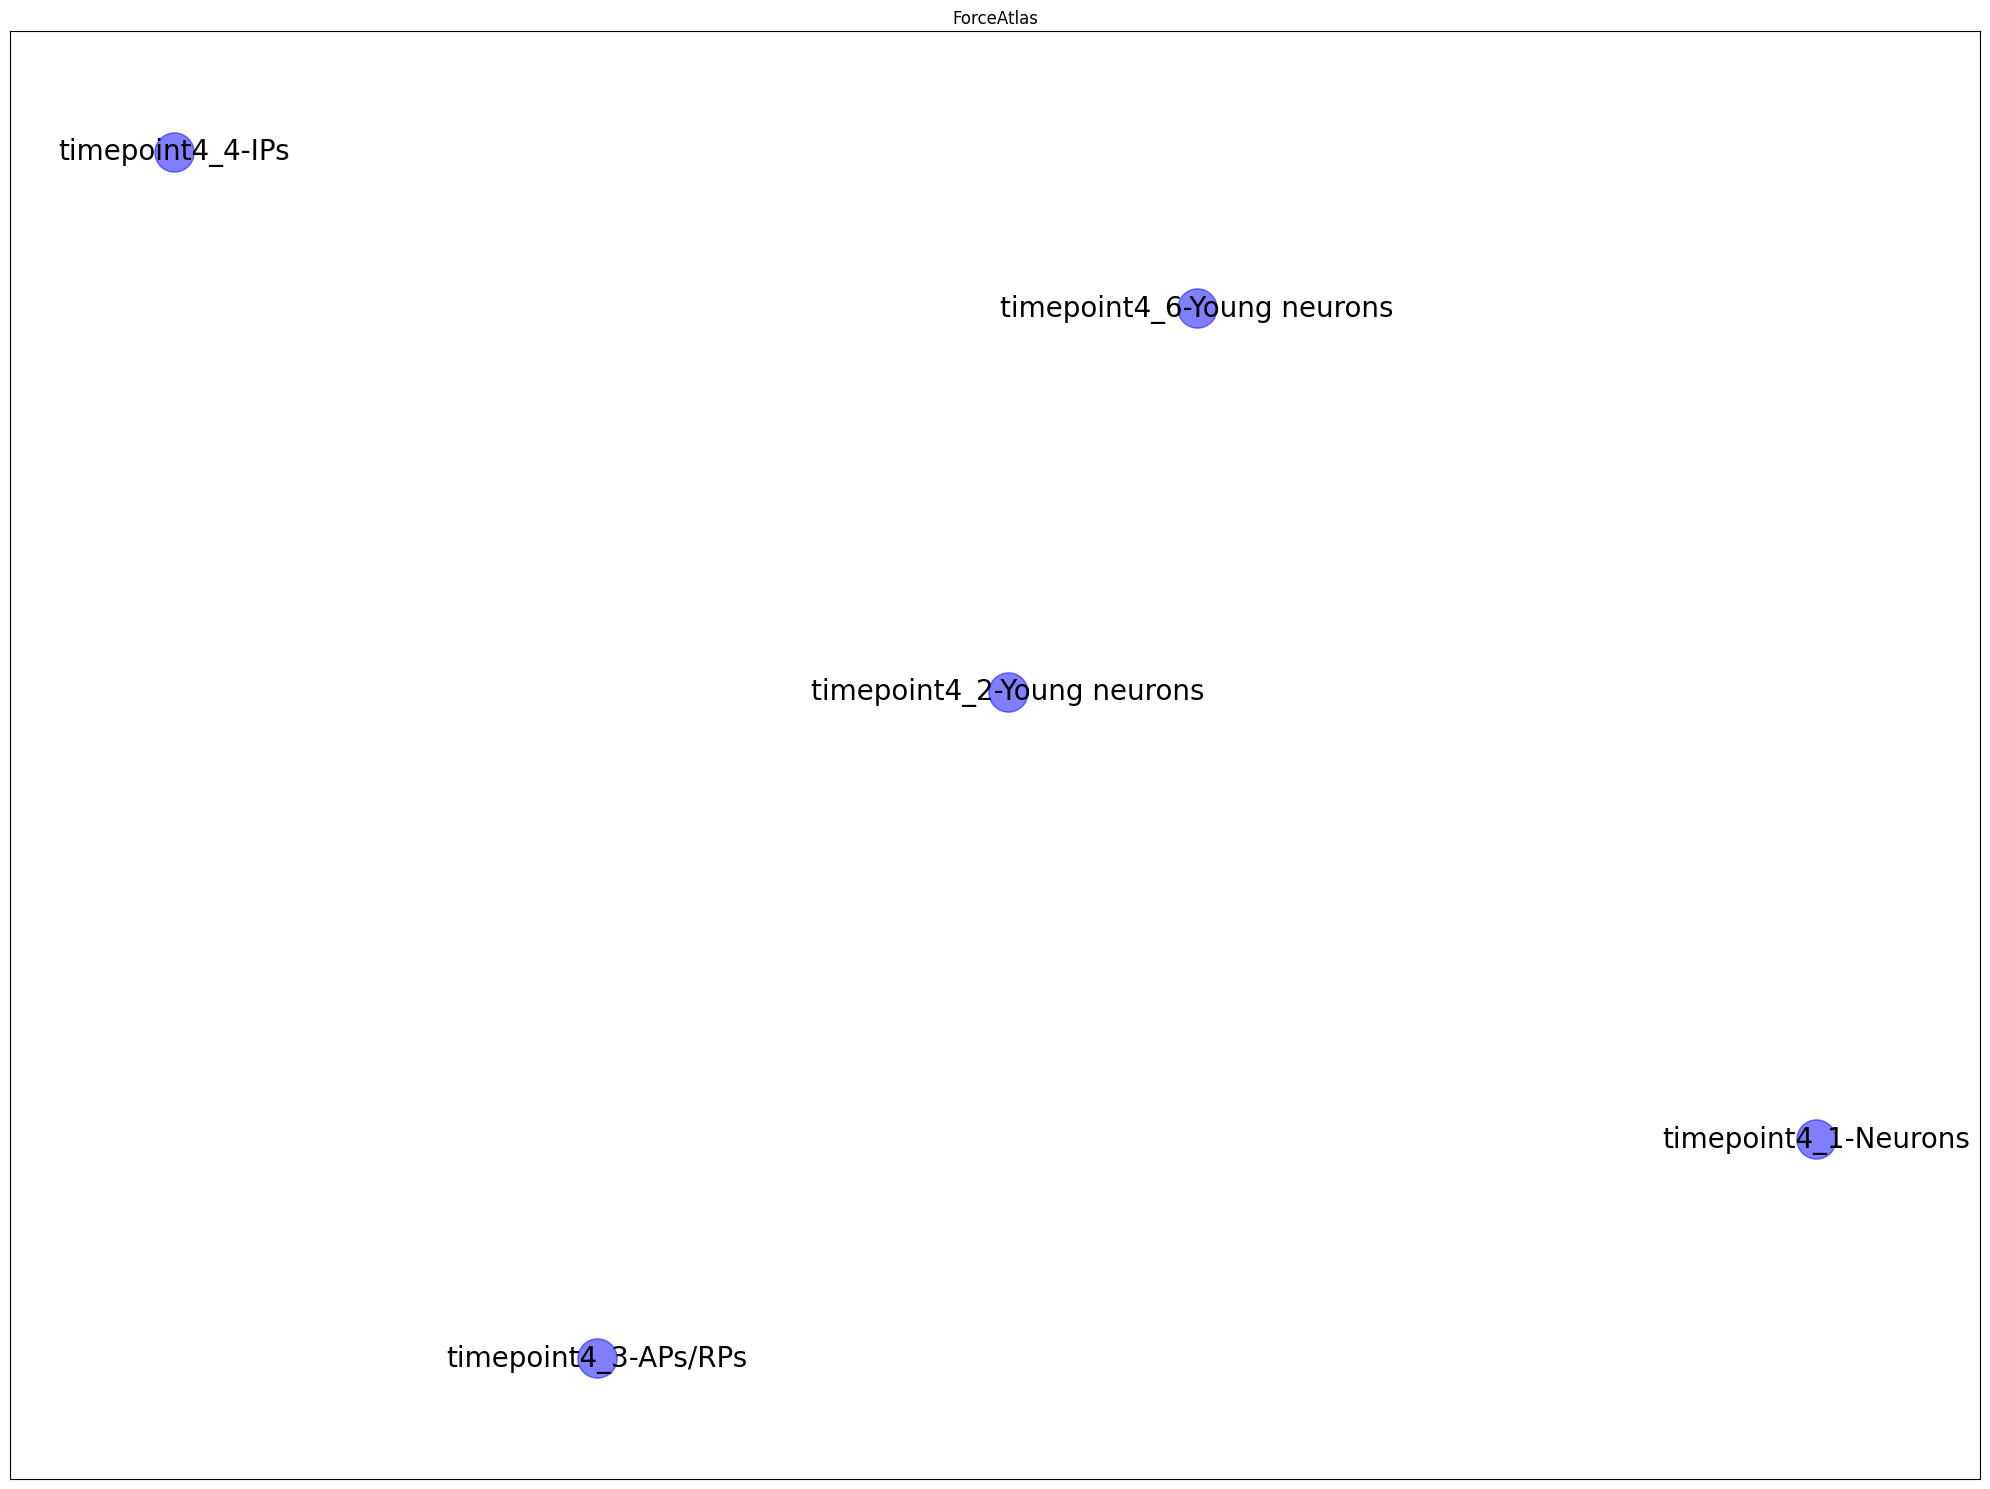


[Function: get_knn_nxG finished, spent time: 2.75s]


[Function: draw_nxG start...]



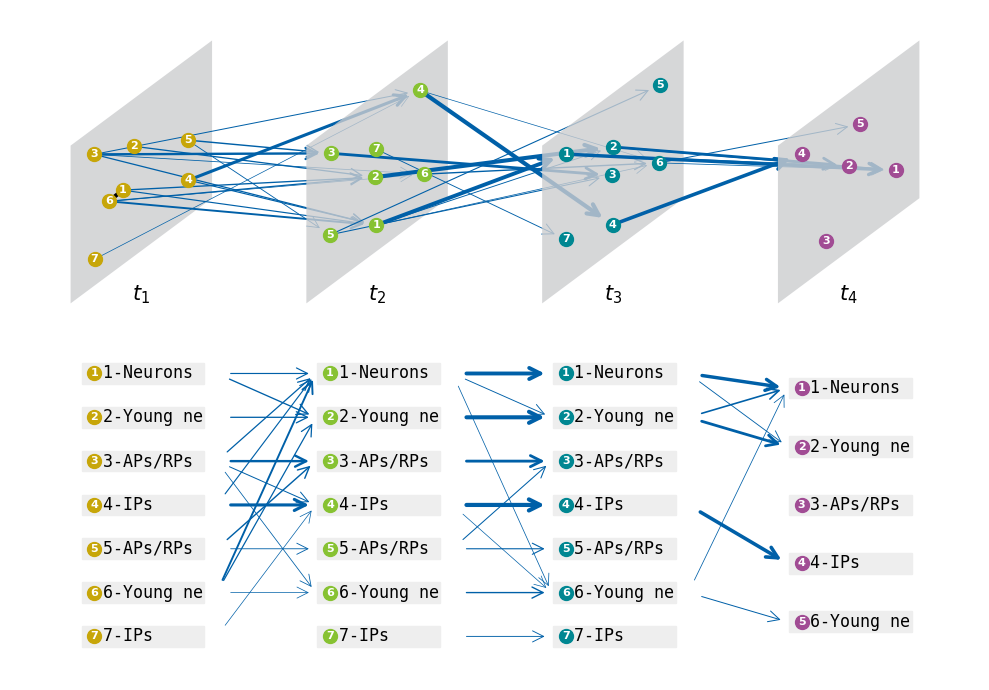


[Function: draw_nxG finished, spent time: 1.45s]


[Function: output_results start...]

timepoint:1
timepoint:2
timepoint:3
timepoint:4

[Function: output_results finished, spent time: 0.18s]


[Function: run_cstreet finished, spent time: 340.45s]



In [10]:
cdata.run_cstreet()

In [42]:
cdata

timepoint:1
AnnData object with n_obs × n_vars = 1402 × 13476
    obs: 'scdata_cluster', 'percent_mito', 'n_counts', 'n_genes', 'cell_id'
    var: 'mt', 'n_cells'
    uns: 'cluster_flag', 'cluster_set', 'cluster_counts', 'within_knn_graph', 'between_later_knn_graph', 'cluster_graph', 'min_score', 'within_G', 'fa_cord'
    obsm: 'within_dists', 'within_ind', 'within_distance', 'between_later_dists', 'between_later_ind', 'between_later_distance'

timepoint:2
AnnData object with n_obs × n_vars = 1129 × 13291
    obs: 'scdata_cluster', 'percent_mito', 'n_counts', 'n_genes', 'cell_id'
    var: 'mt', 'n_cells'
    uns: 'cluster_flag', 'cluster_set', 'cluster_counts', 'within_knn_graph', 'between_previous_knn_graph', 'between_later_knn_graph', 'cluster_graph', 'min_score', 'within_G', 'fa_cord'
    obsm: 'within_dists', 'within_ind', 'within_distance', 'between_previous_dists', 'between_previous_ind', 'between_previous_distance', 'between_later_dists', 'between_later_ind', 'between_later_dist

In [46]:
res_path = '/data1/home/jyj/PROJECT/2025/2025_GTra/analysis/BENCHMARK/CStreet/CStreet_rank'

res = pd.read_csv(f'{res_path}/CStreet_rank_CellStatesConnCytoscape.txt', sep="\t")

In [54]:
# 1️⃣ Ground-truth transition rules 정의
transition_rules = {
    "3-APs/RPs": ["3-APs/RPs", "4-IPs", "2-Young neurons", "1-Neurons",
                  "5-APs/RPs", "6-Young neurons", "7-IPs"],
    "5-APs/RPs": ["3-APs/RPs", "4-IPs", "2-Young neurons", "1-Neurons",
                  "5-APs/RPs", "6-Young neurons", "7-IPs"],
    "4-IPs": ["4-IPs", "2-Young neurons", "6-Young neurons", "7-IPs"],
    "7-IPs": ["4-IPs", "2-Young neurons", "6-Young neurons", "7-IPs"],
    "2-Young neurons": ["2-Young neurons", "1-Neurons", "6-Young neurons"],
    "6-Young neurons": ["2-Young neurons", "1-Neurons", "6-Young neurons"],
    "1-Neurons": ["1-Neurons"]
}

# 2️⃣ Ground truth edges DataFrame 만들기
true_edges = []
for from_label, to_list in transition_rules.items():
    for to_label in to_list:
        true_edges.append((from_label, to_label))
true_edges = pd.DataFrame(true_edges, columns=["from", "to"])

# true_set 생성 (R의 paste)
true_set = set(true_edges.apply(lambda x: f"{x['from']}_{x['to']}", axis=1))

In [50]:
pred_df = res[res['ConnectionProbabilities'] > cdata.params.Threshold_MinProbability]

In [51]:
import re

def extract_label(s):
    # "timepoint1_(1)3-APs/RPs" → "3-APs/RPs"
    return re.sub(r"^timepoint\d+_\(\d+\)", "", s)

pred_df["from_state"] = pred_df["SourceNode"].apply(extract_label)
pred_df["to_state"] = pred_df["TargetNode"].apply(extract_label)

In [55]:
# 4️⃣ 예측 edge 세트 생성
pred_set = set(pred_df.apply(lambda x: f"{x['from_state']}_{x['to_state']}", axis=1))

# 5️⃣ TP, FP, FN 계산
TP = len(pred_set & true_set)
FP = len(pred_set - true_set)
FN = len(true_set - pred_set)

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score  = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"TP: {TP}, FP: {FP}, FN: {FN}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

TP: 16, FP: 3, FN: 13
Precision: 0.84
Recall: 0.55
F1 Score: 0.67


In [57]:
true_edges = [
    # E11.5 → E13.5
    ("6-Young neurons", "2-Young neurons"),
    ("7-IPs", "3-APs/RPs"),
    ("3-APs/RPs", "5-APs/RPs"),
    ("5-APs/RPs", "6-Young neurons"),
    # E13.5 → E15.5
    ("2-Young neurons", "1-Neurons"),
    ("3-APs/RPs", "3-APs/RPs"),
    ("5-APs/RPs", "5-APs/RPs"),
    ("6-Young neurons", "5-APs/RPs"),
    # E15.5 → E17.5
    ("1-Neurons", "1-Neurons"),
    ("2-Young neurons", "1-Neurons"),
    ("3-APs/RPs", "4-IPs"),
    ("5-APs/RPs", "4-IPs")
]

true_set = set(f"{a}_{b}" for a, b in true_edges)


In [58]:
pred_df["from_state"] = pred_df["SourceNode"].str.replace(r"^timepoint\d+_\(\d+\)", "", regex=True)
pred_df["to_state"] = pred_df["TargetNode"].str.replace(r"^timepoint\d+_\(\d+\)", "", regex=True)
pred_set = set(pred_df.apply(lambda x: f"{x['from_state']}_{x['to_state']}", axis=1))

TP = len(pred_set & true_set)
FP = len(pred_set - true_set)
FN = len(true_set - pred_set)

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score  = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Precision: 0.32
Recall: 0.55
F1 Score: 0.40
